<a href="https://colab.research.google.com/github/GAOYUEtianc/DNA_discriminator/blob/main/DNA_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
# Load model
from keras.models import load_model
path_model_1 = F"/content/gdrive/My Drive/DNA_Discriminator.hdf5"
path_model_2 = F"/content/gdrive/My Drive/DNA_Discriminator_Shuffle.hdf5"
discriminator = load_model(path_model_1)
discriminator_2 = load_model(path_model_2)

In [35]:
# Get test data
import pandas as pd
import numpy as np
 
path_test = F"/content/gdrive/My Drive/train.csv"
Trainsequence = pd.read_csv(path_test)
n = Trainsequence.shape[0]
X_test = np.zeros((n, 100, 4)) # For each sequence (of length at most 100, there're 4 possible bases)
mapping = dict(zip("ACGT", range(4)))
for i in range(0,n):
    seq = [mapping[j] for j in Trainsequence.iloc[i][0]]
    X_test[i,:len(Trainsequence.iloc[i][0]),:] = np.eye(4)[seq]

y_test = np.ones((n, 1))


(7499, 1)
AUC for discriminator_1 (use reverse seq as training data) : nan
AUPRC for discriminator_1 (use reverse seq as training data) : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


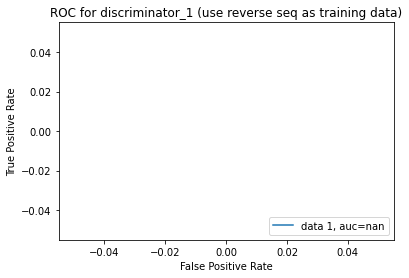

In [36]:
# Evaluate the Model 1
from sklearn.metrics import roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt
pred = discriminator.predict(X_test)
print(pred.shape)
fpr, tpr, thresholds = roc_curve(y_test, pred)
AUC = auc(fpr, tpr)
AUPRC = average_precision_score(y_test, pred)
print("AUC for discriminator_1 (use reverse seq as training data) :", AUC)
print("AUPRC for discriminator_1 (use reverse seq as training data) :", AUPRC)
plt.plot(fpr,tpr,label="data 1, auc="+str(AUC))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for discriminator_1 (use reverse seq as training data)")
plt.legend(loc=4)
plt.show()

(7499, 1)
AUC for discriminator_2 (use shuffled seq as training data) : nan
AUPRC for discriminator_2 (use shuffled seq as training data) : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


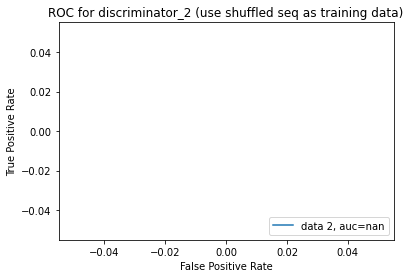

In [37]:
# Evaluate the Model 2
from sklearn.metrics import roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt
pred = discriminator_2.predict(X_test)
print(pred.shape)
fpr, tpr, thresholds = roc_curve(y_test, pred)
AUC = auc(fpr, tpr)
AUPRC = average_precision_score(y_test, pred)
print("AUC for discriminator_2 (use shuffled seq as training data) :", AUC)
print("AUPRC for discriminator_2 (use shuffled seq as training data) :", AUPRC)
plt.plot(fpr,tpr,label="data 2, auc="+str(AUC))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for discriminator_2 (use shuffled seq as training data)")
plt.legend(loc=4)
plt.show()

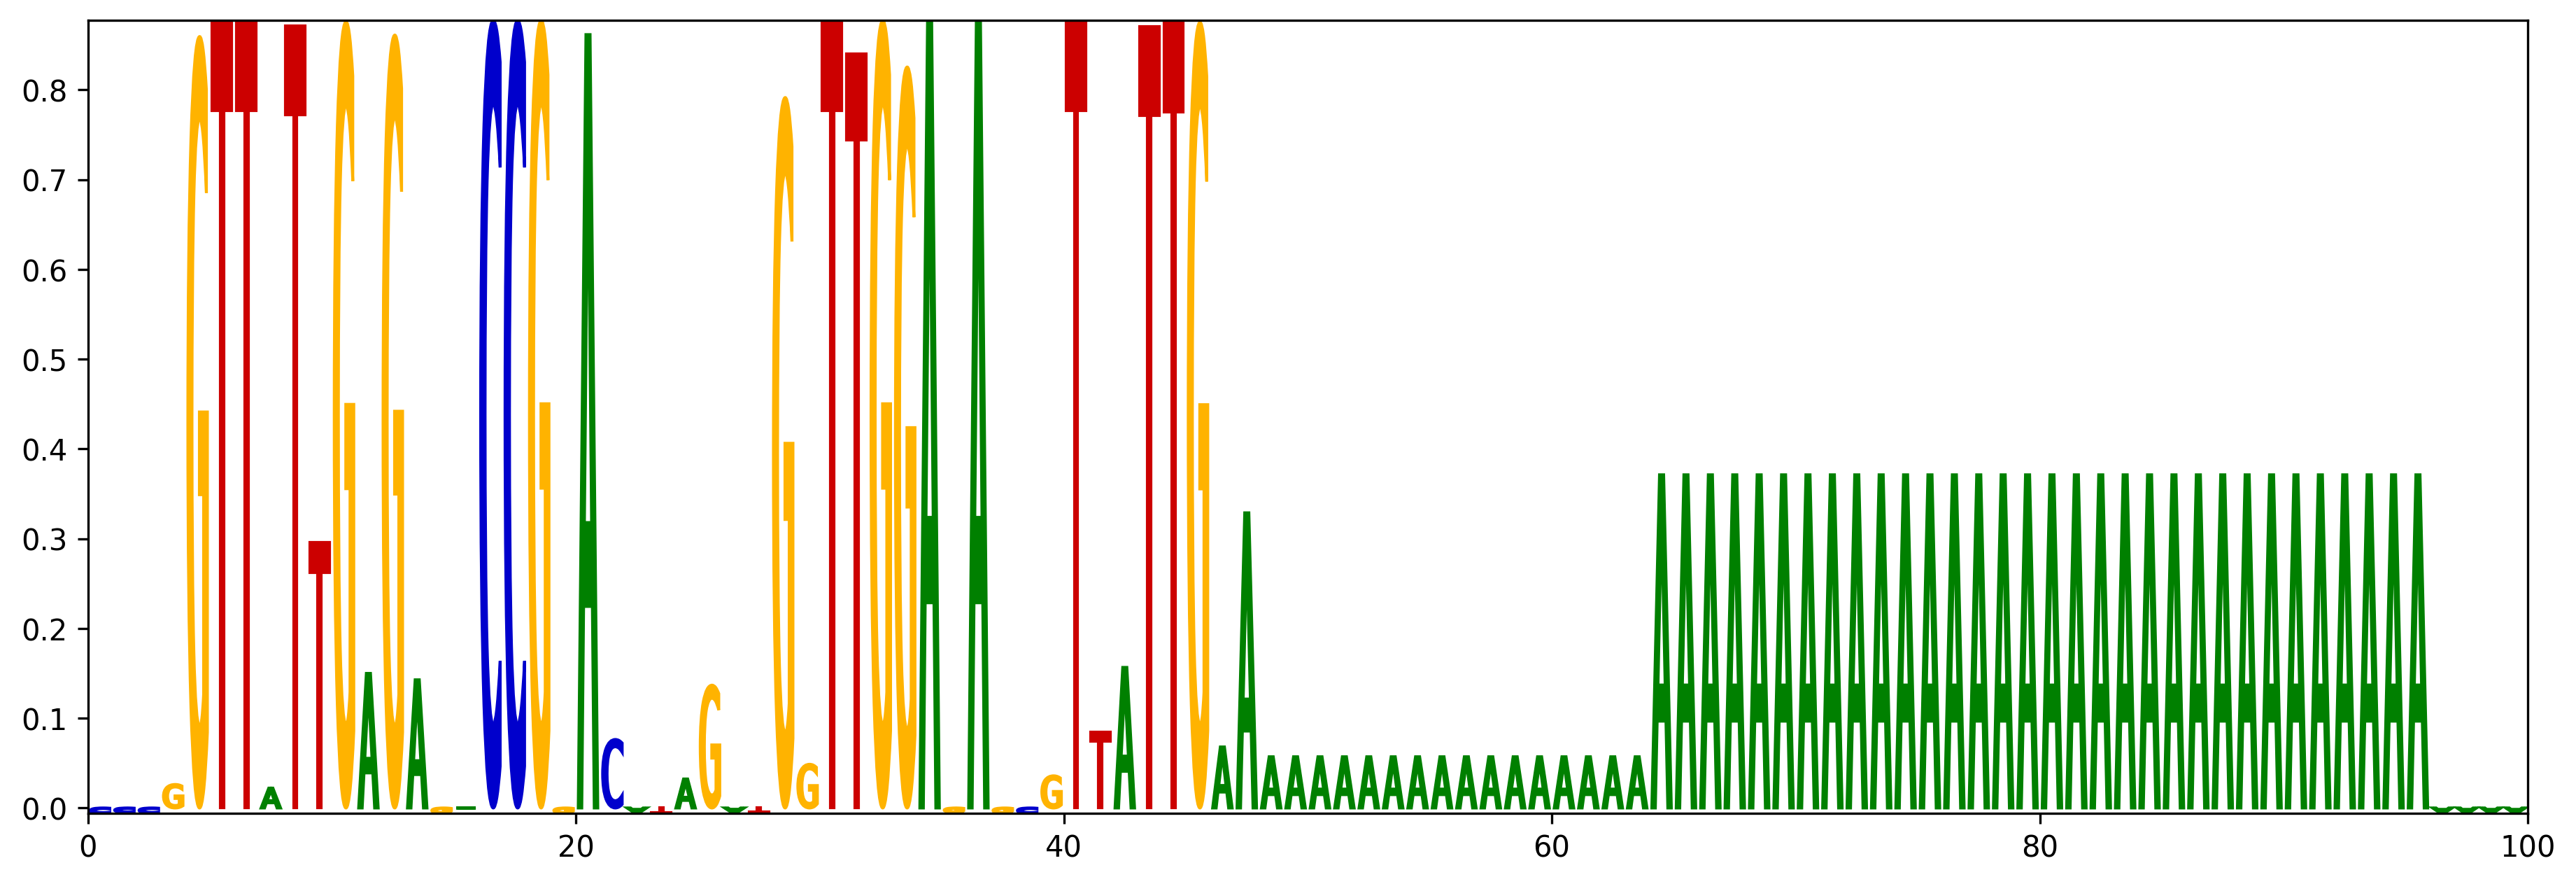

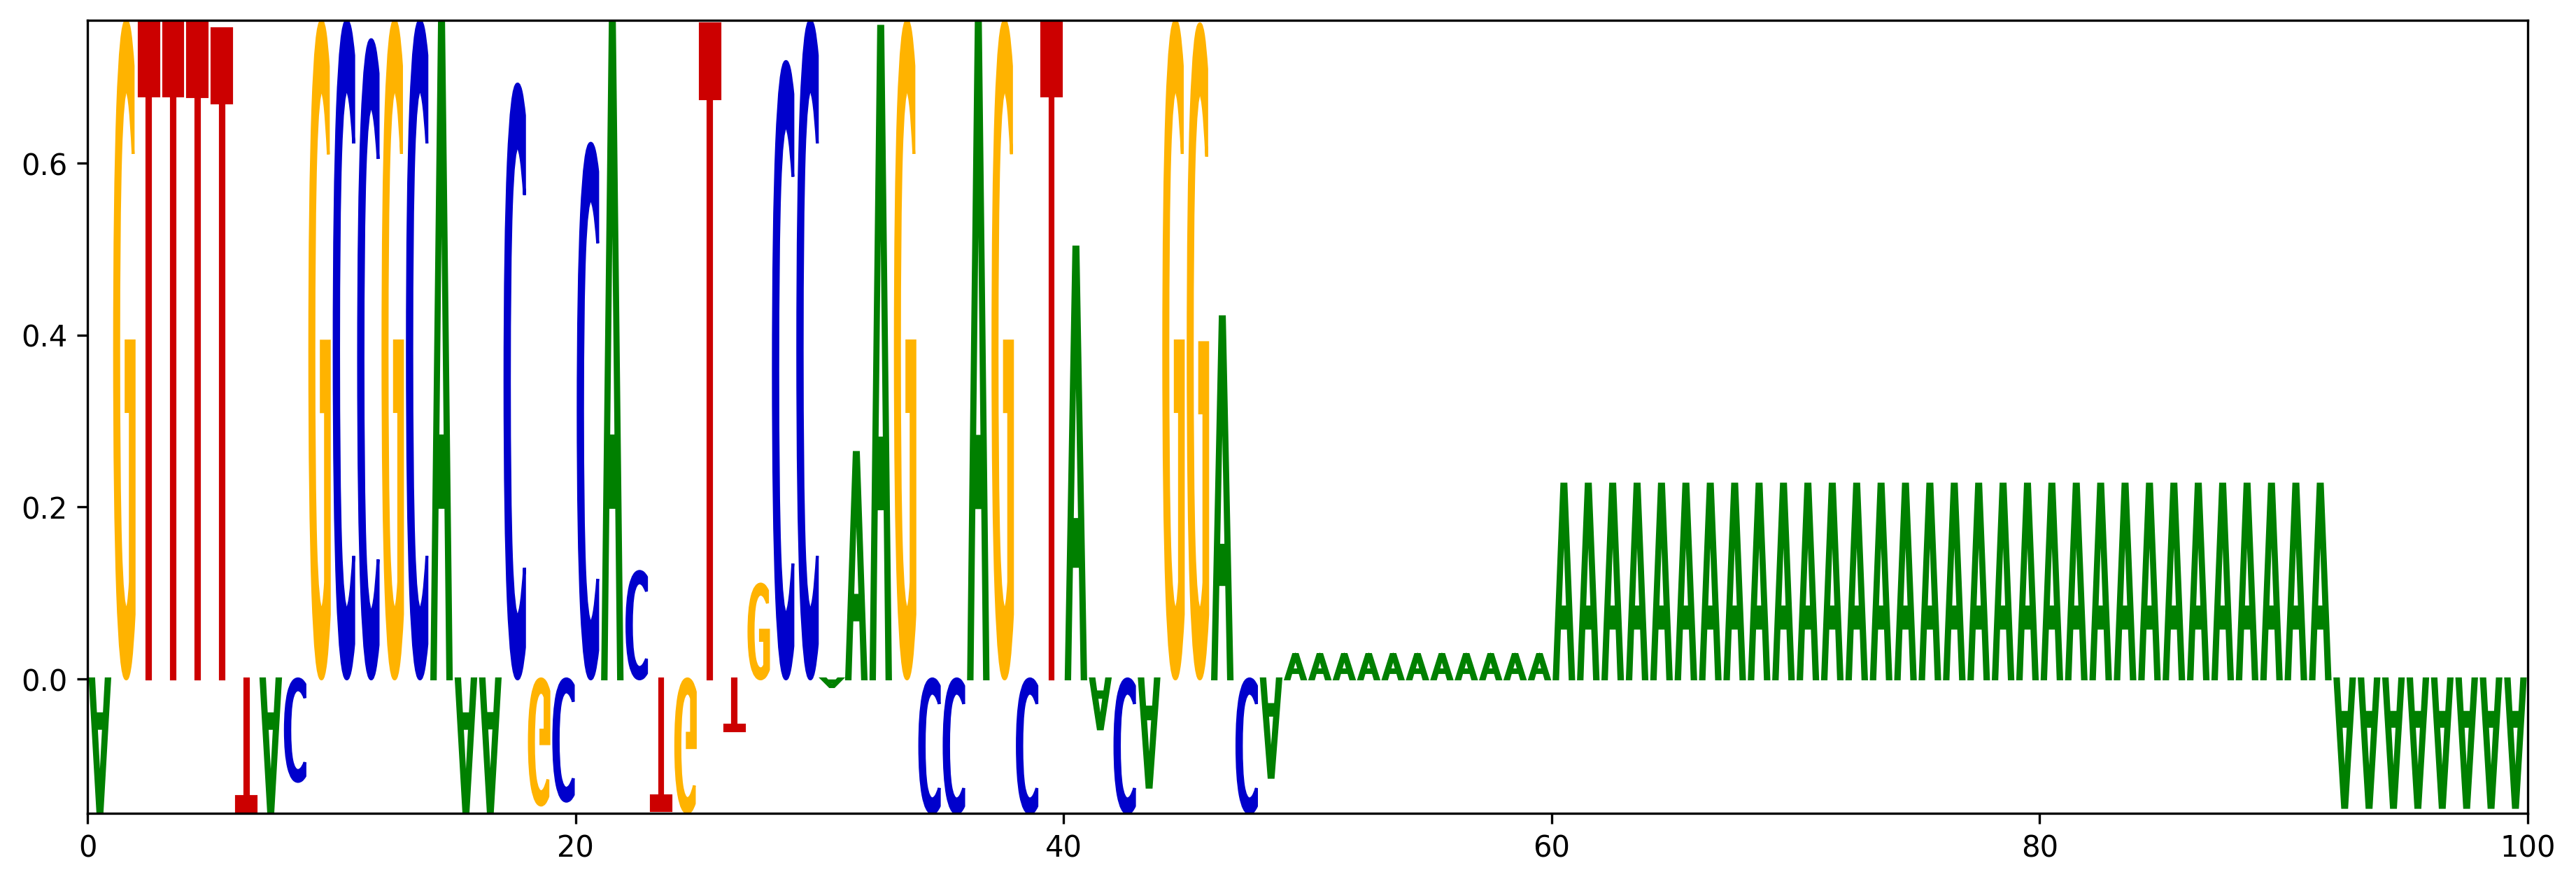

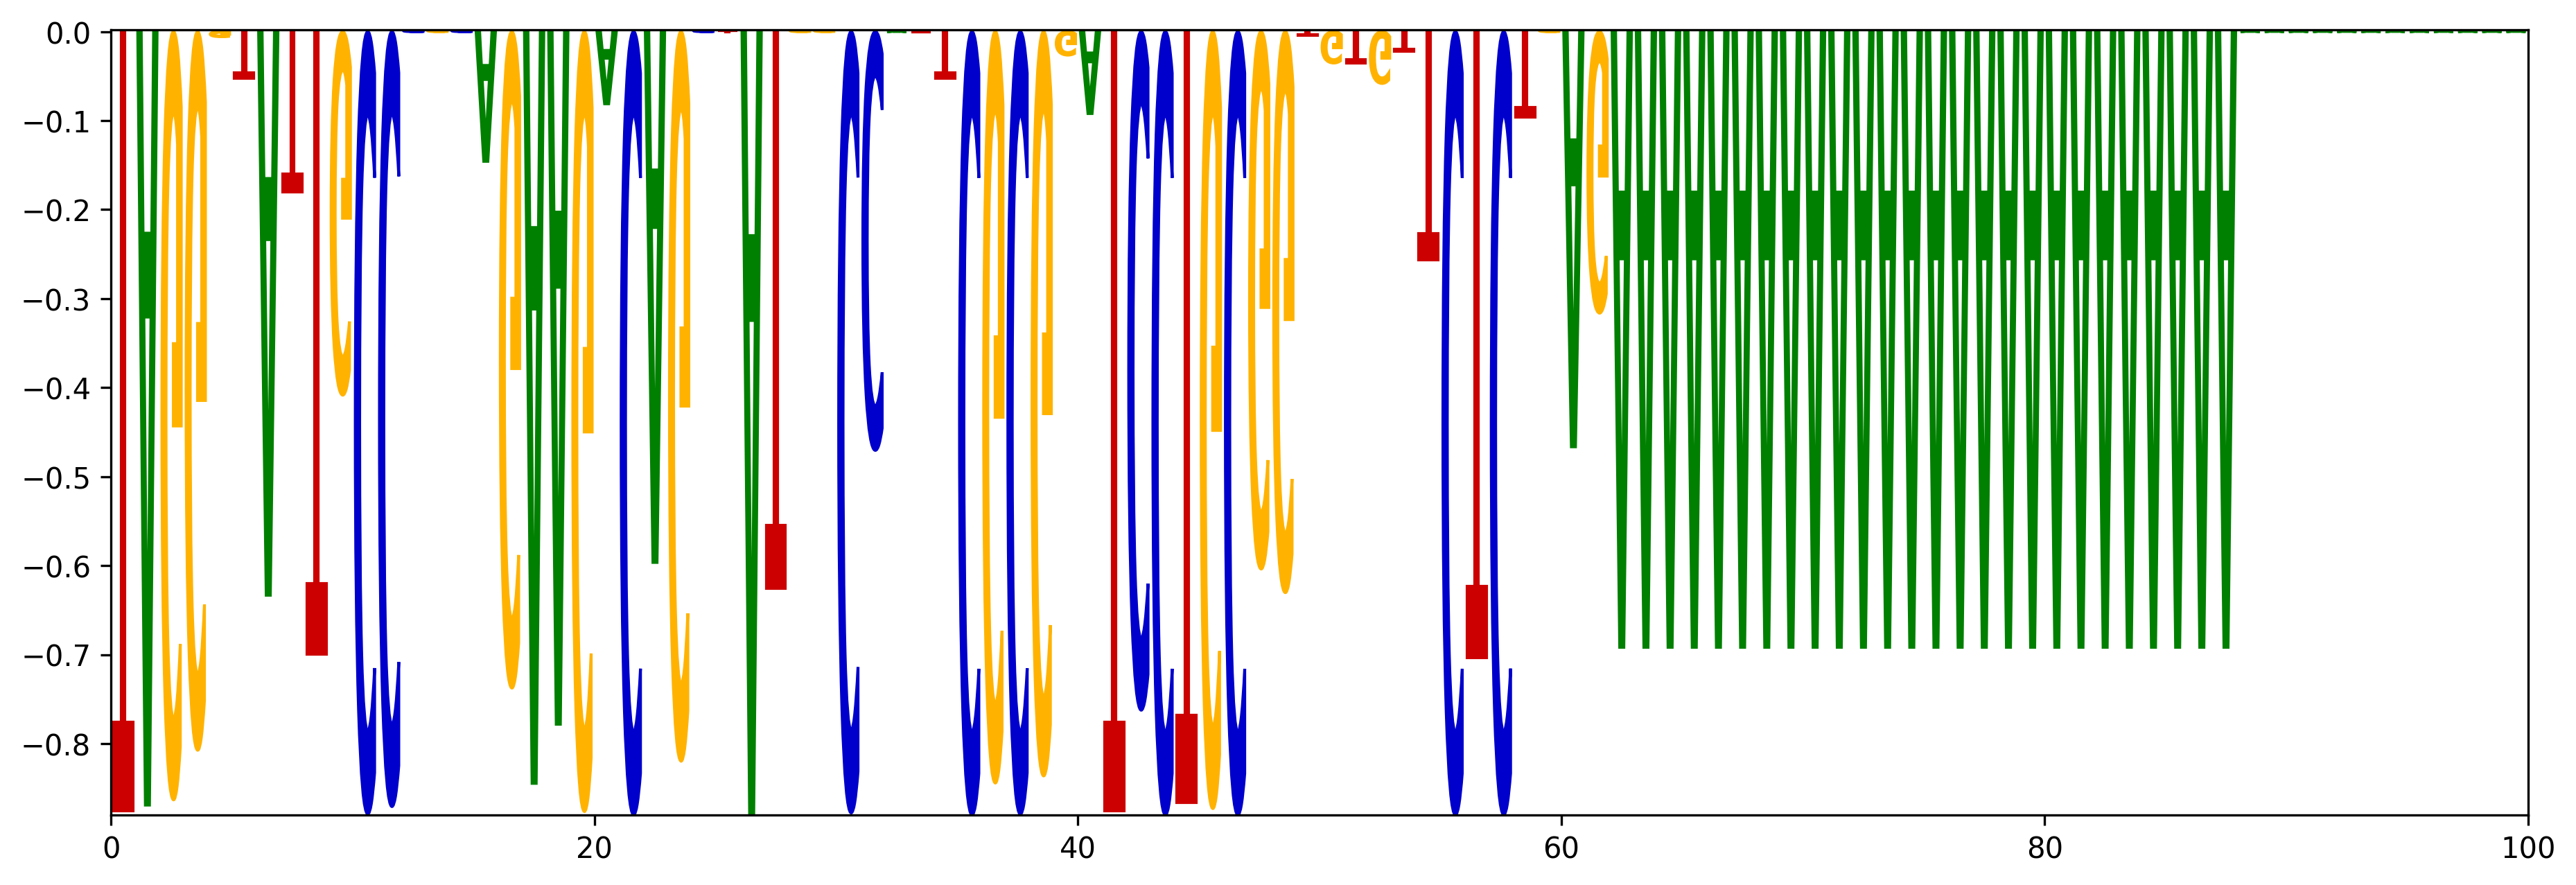

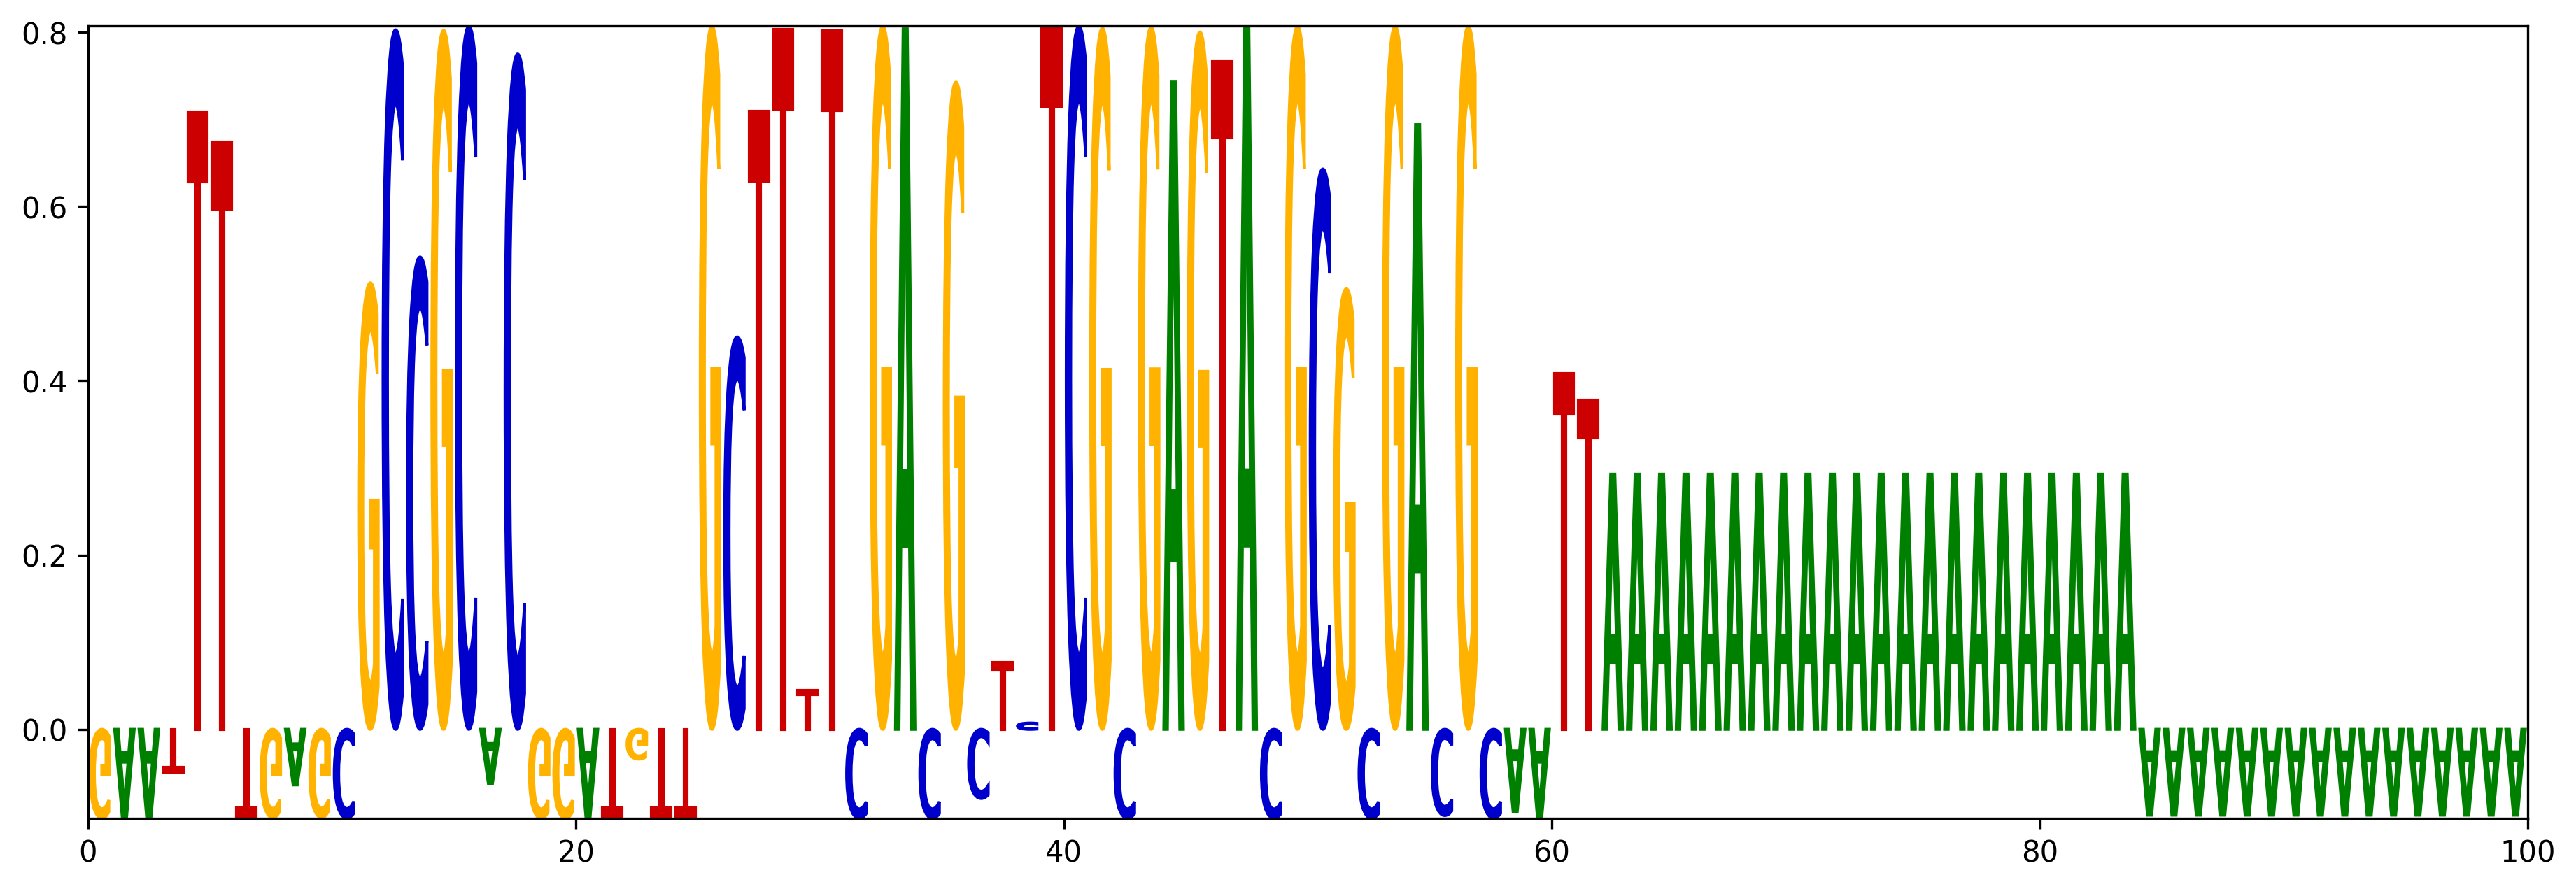

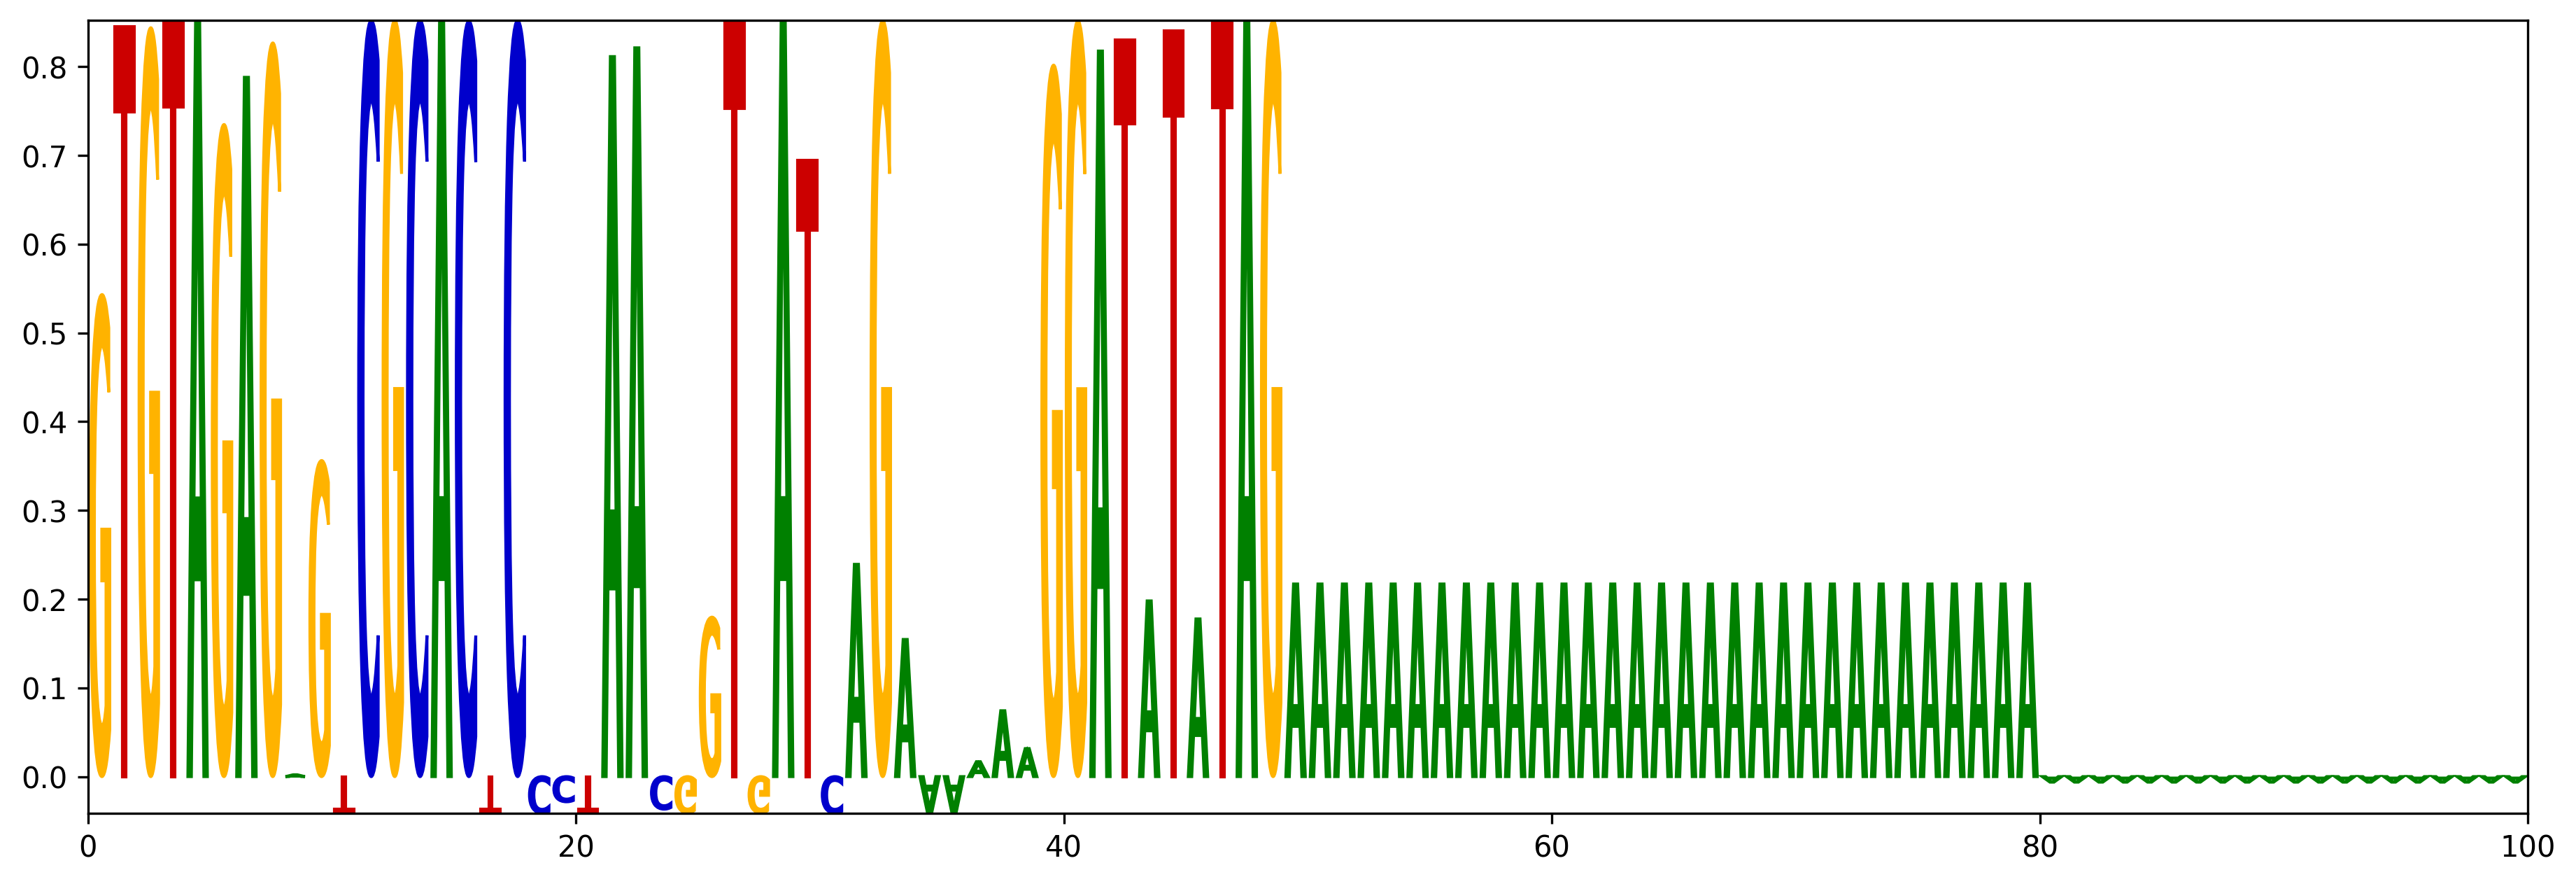

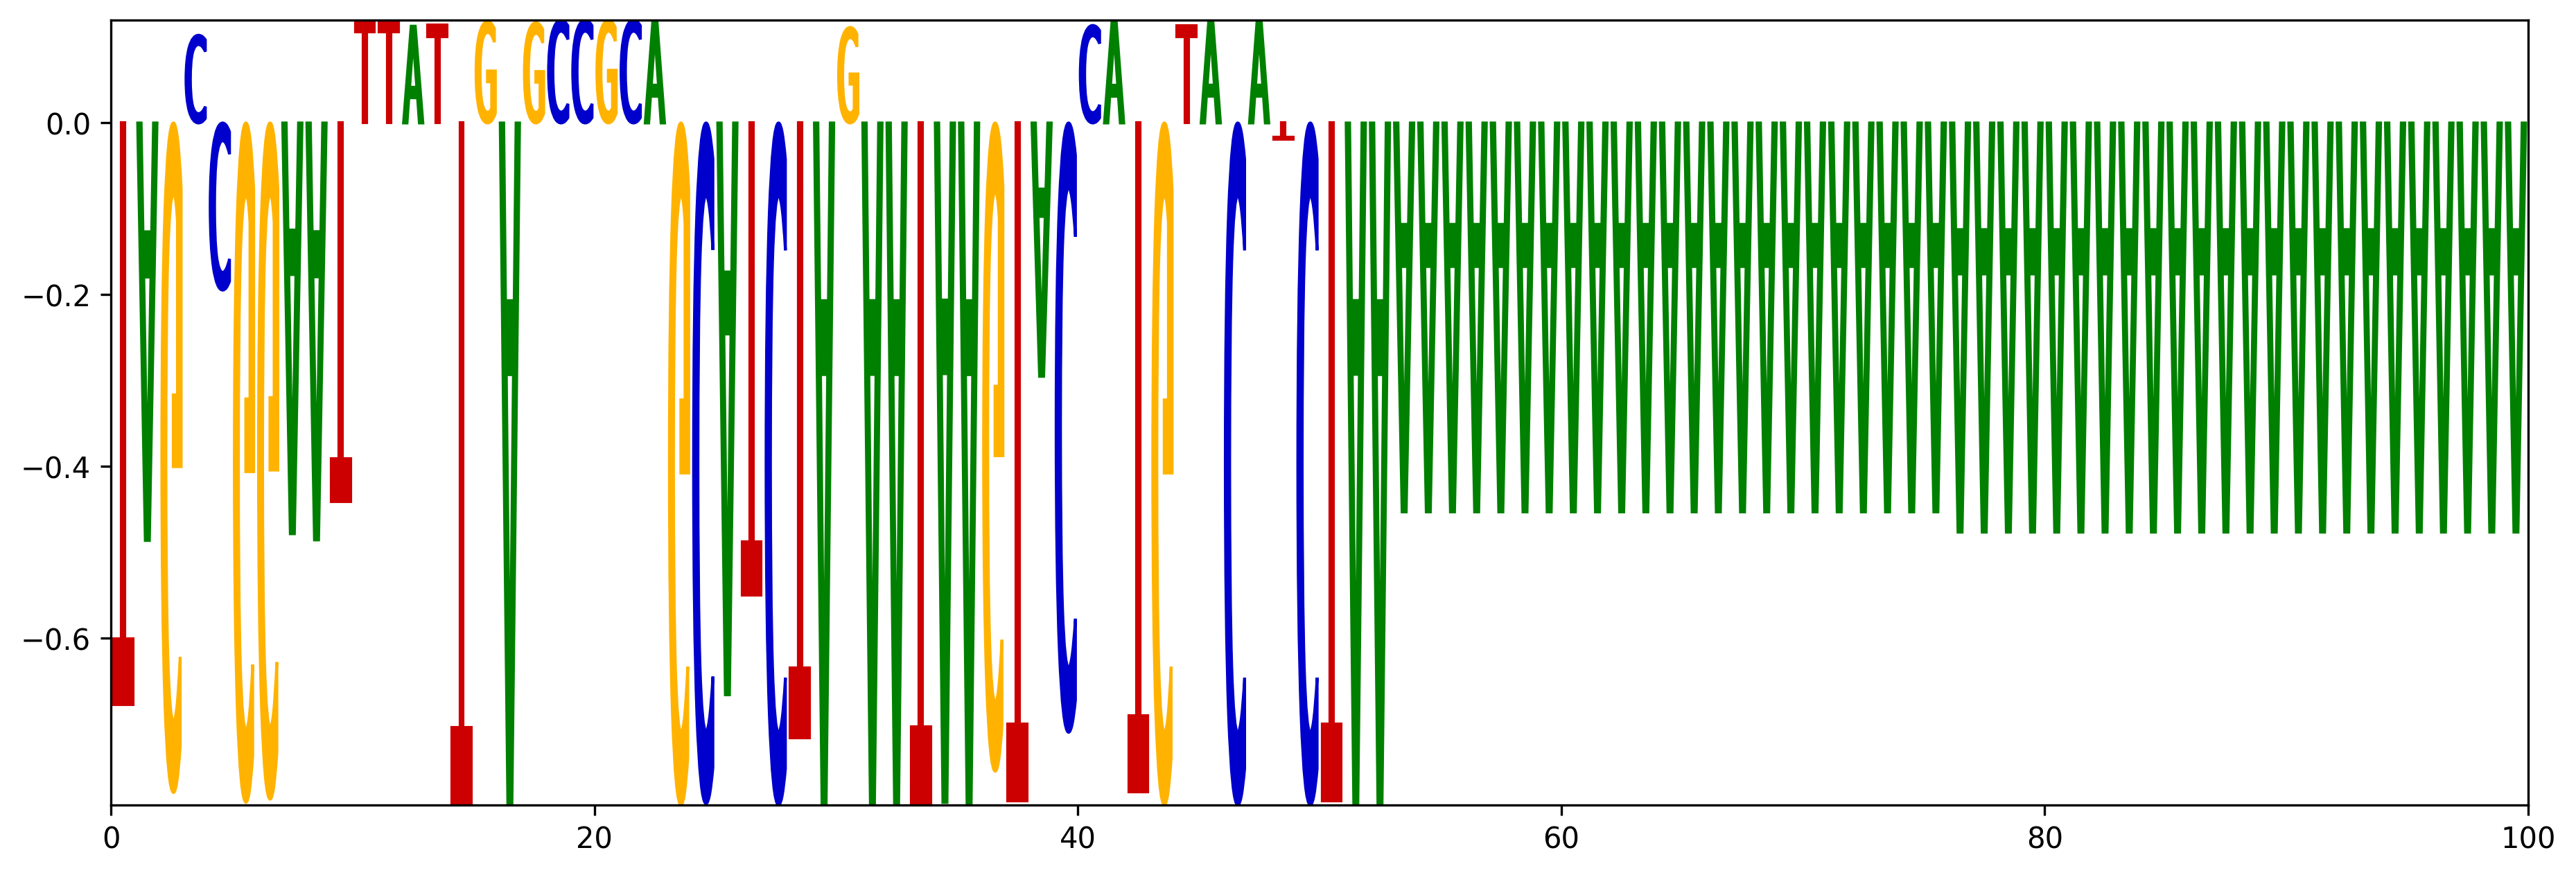

In [40]:
# Plot the 'ChIP-seq' for randomly 6 sequences for Model 1
index = np.random.randint(n, size=6)
sequencePlot = X_test[index,:]
sequencePredict = discriminator.predict(sequencePlot).flatten()

# Generate a new set of X, where for each sequence every nucleotide is consecutively set to 0
sequencePlot = sequencePlot.reshape(sequencePlot.shape[0],sequencePlot.shape[1],sequencePlot.shape[2],1)
sequenceRepeat = np.repeat(sequencePlot, 100, axis=0)
# Generate sequence with one deleted nucleotide
a = np.ones((100, 100), int)
np.fill_diagonal(a, 0)
b = np.repeat(a.reshape((1,100,100)), sequencePlot.shape[0], axis=0)
c = np.concatenate(b, axis=0)
d = np.multiply(sequenceRepeat, np.repeat(c.reshape((sequenceRepeat.shape[0], 100, 1, 1)), 4, axis=2))
#Calculate the prediction for each sequence with one deleted nucleotide
d_pred = discriminator.predict(d.reshape(600, 100, 4)).flatten()

# Score: Difference between prediction and d_pred
scores = np.reshape((np.repeat(sequencePredict, 100) - d_pred), (len(index),100))
import sys
import os
sys.path.append('/content/gdrive/My Drive')
import motif_plotter
import matplotlib.pyplot as plt

for i in range(len(index)):
    fig=plt.figure(figsize=(15, 5), dpi= 300)
    ax=fig.add_subplot(111)
    motif_plotter.make_single_sequence_spectrum(ax, 
                                                sequencePlot[i].reshape((100, 4)),
                                                np.arcsinh(scores[i]).reshape(100,1))
    plt.show()

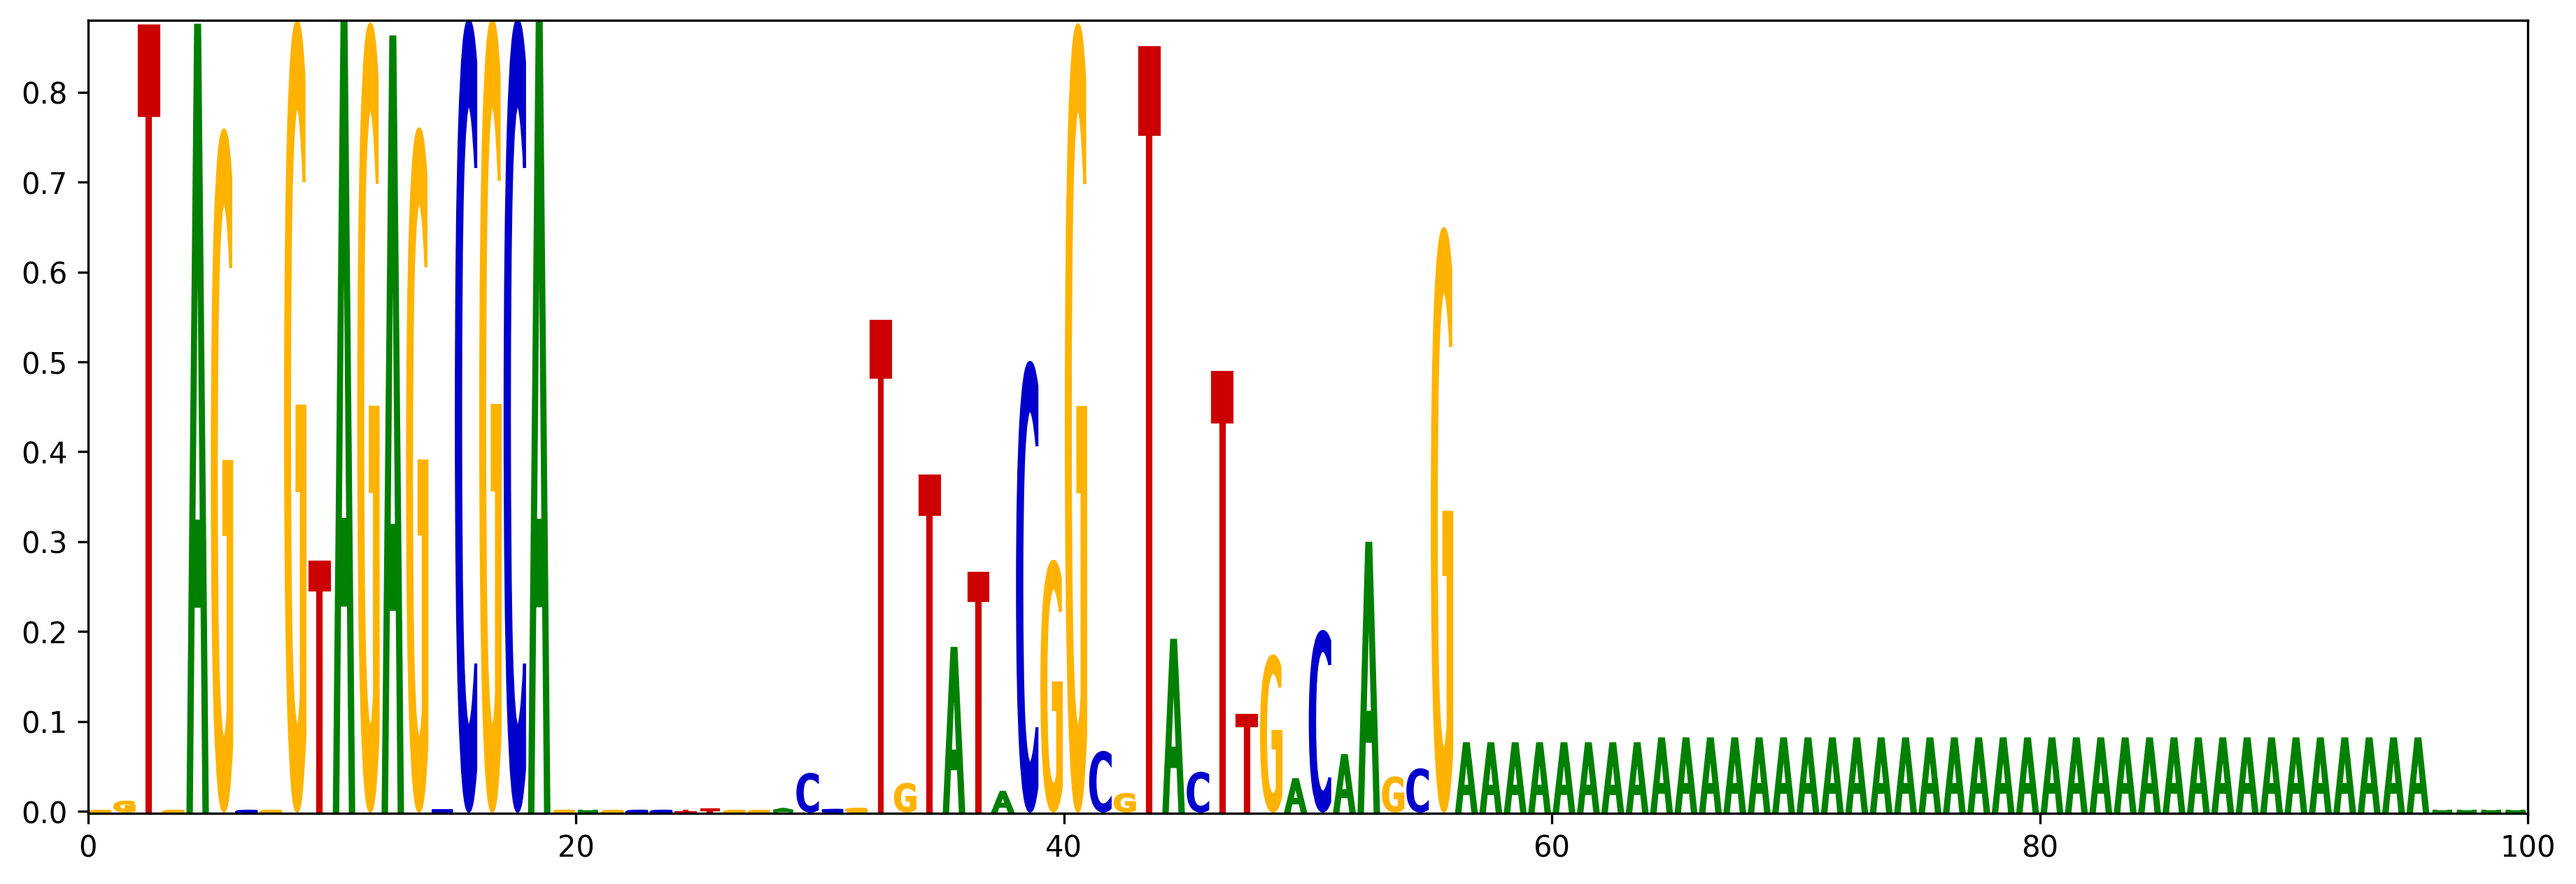

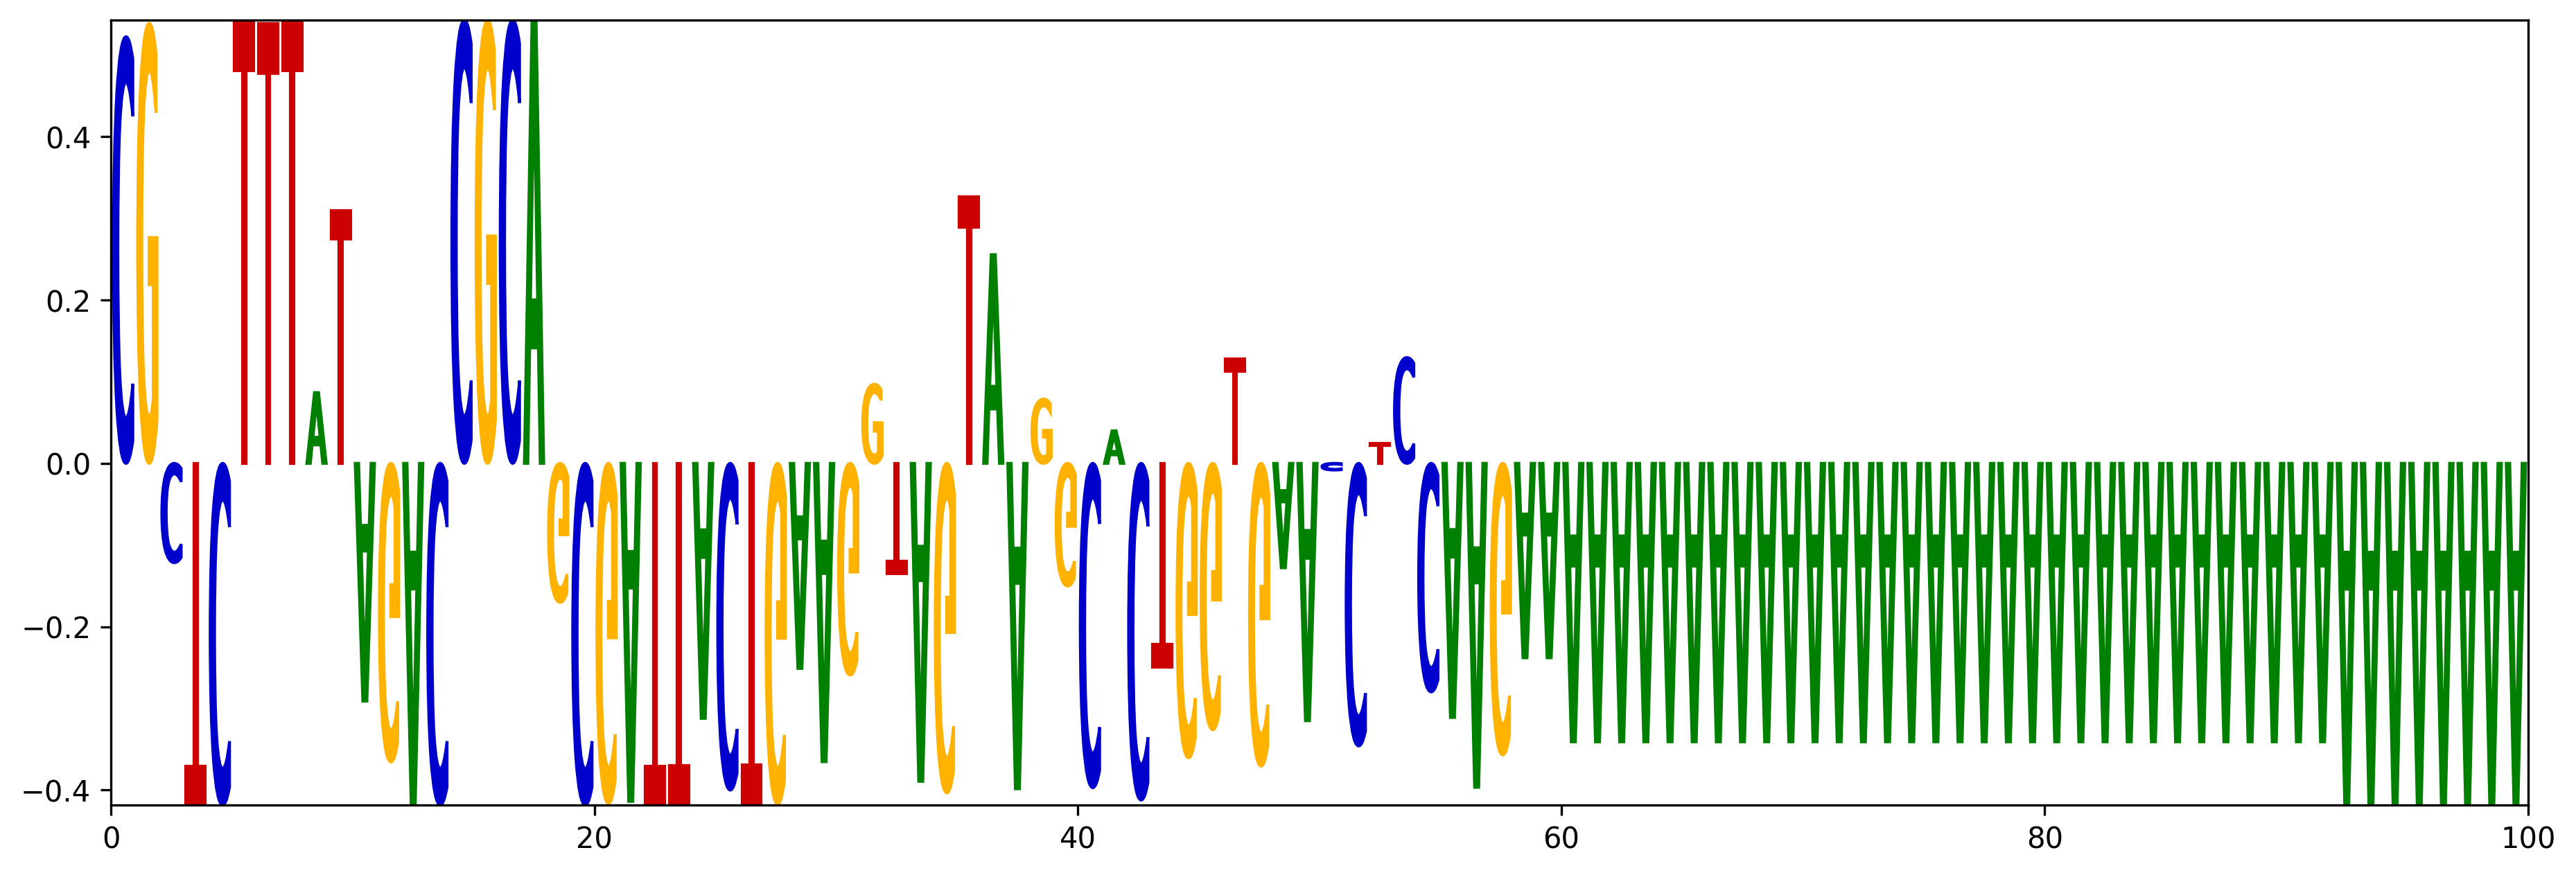

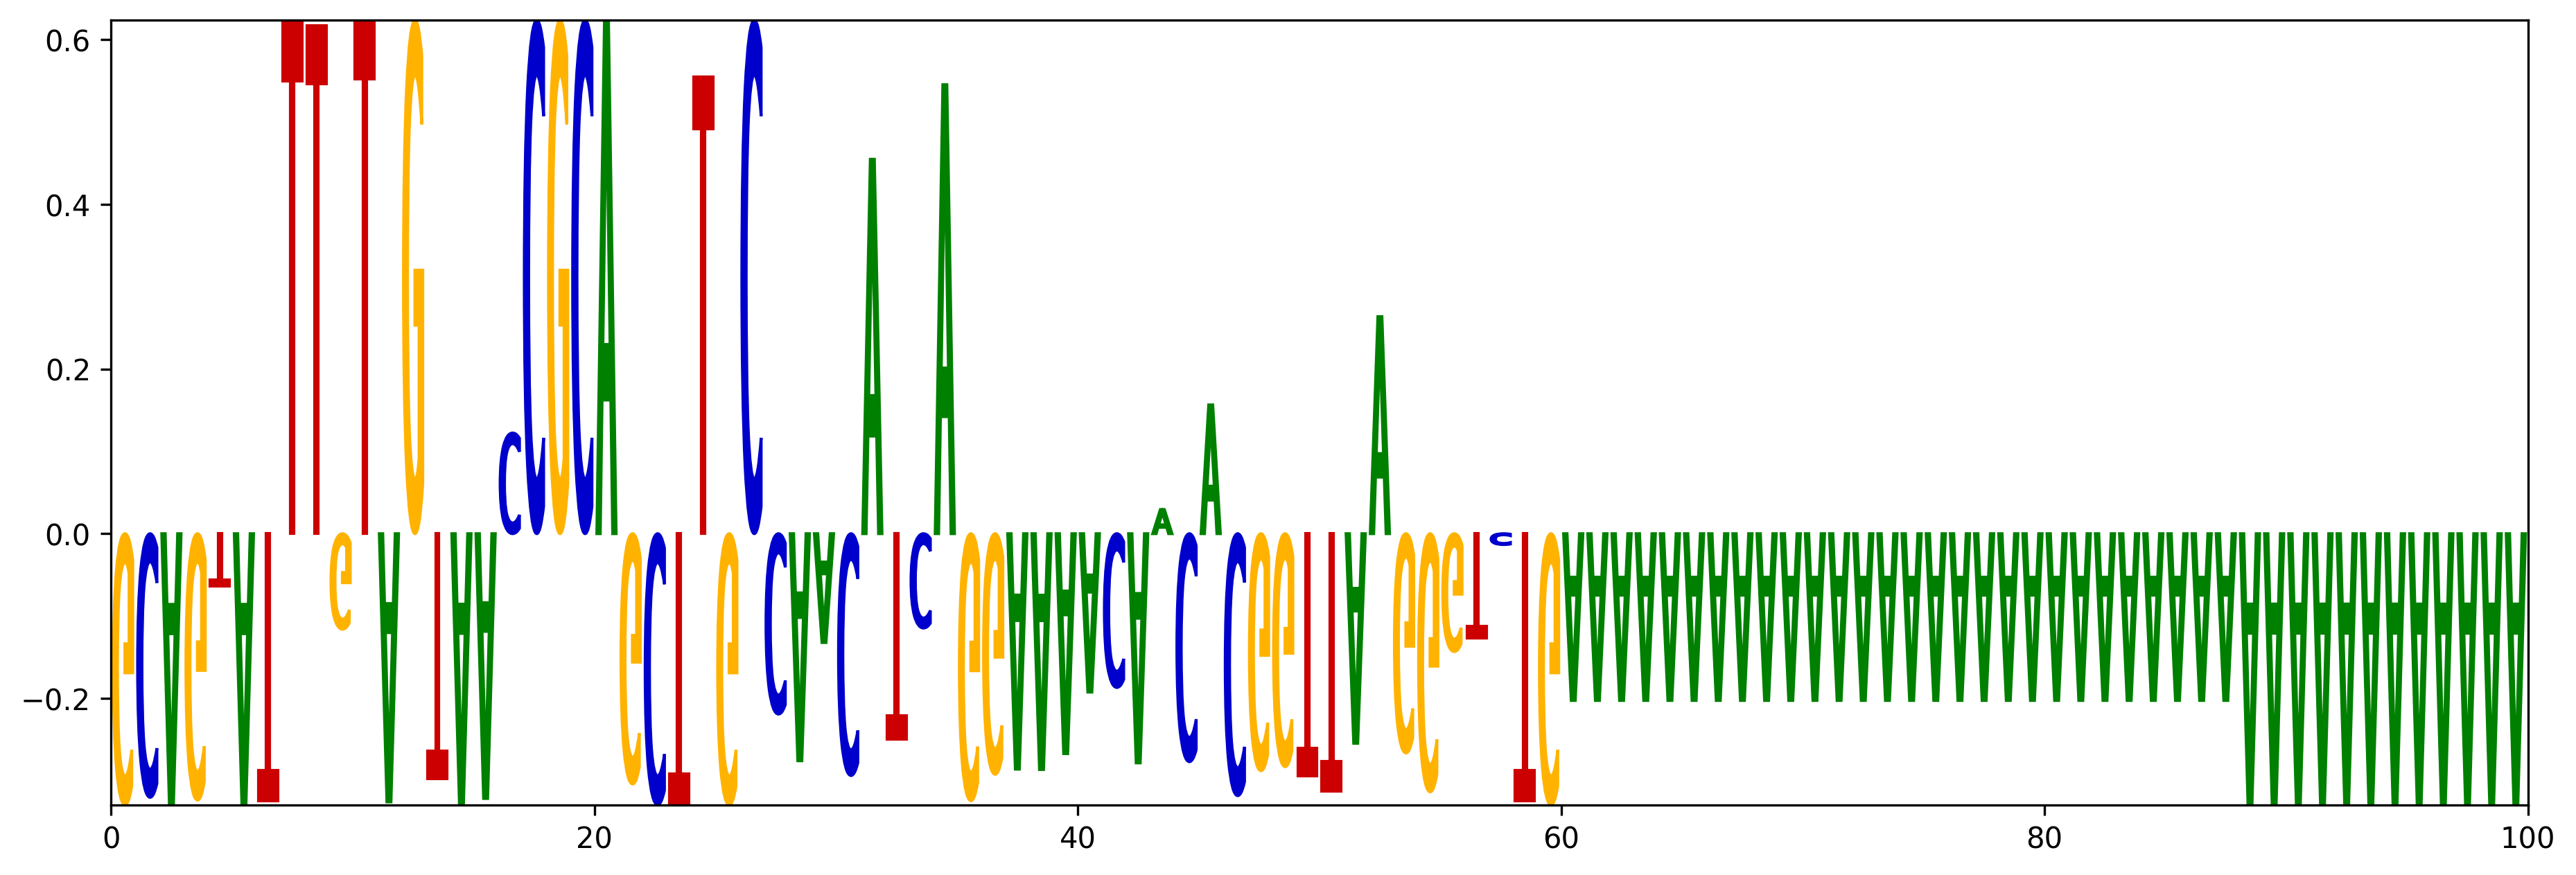

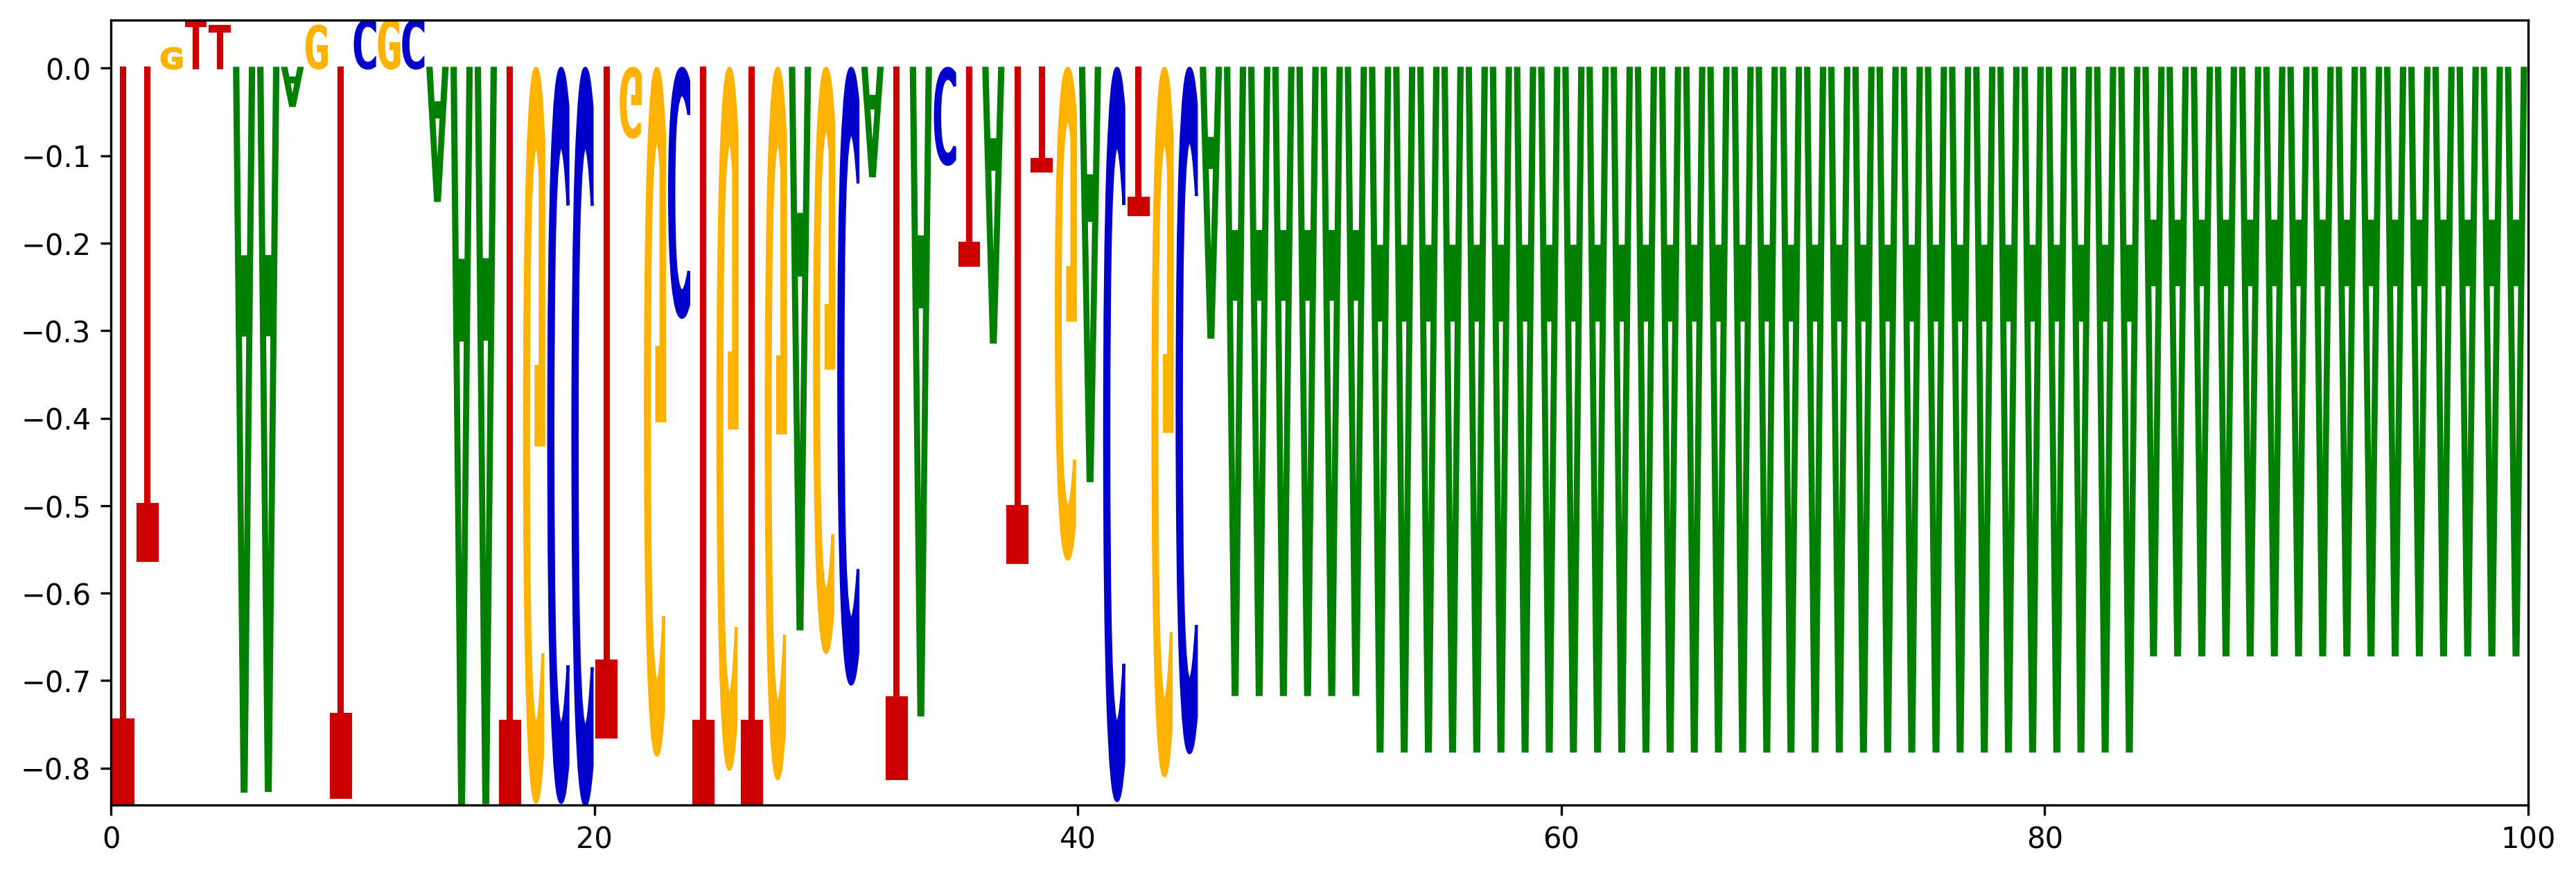

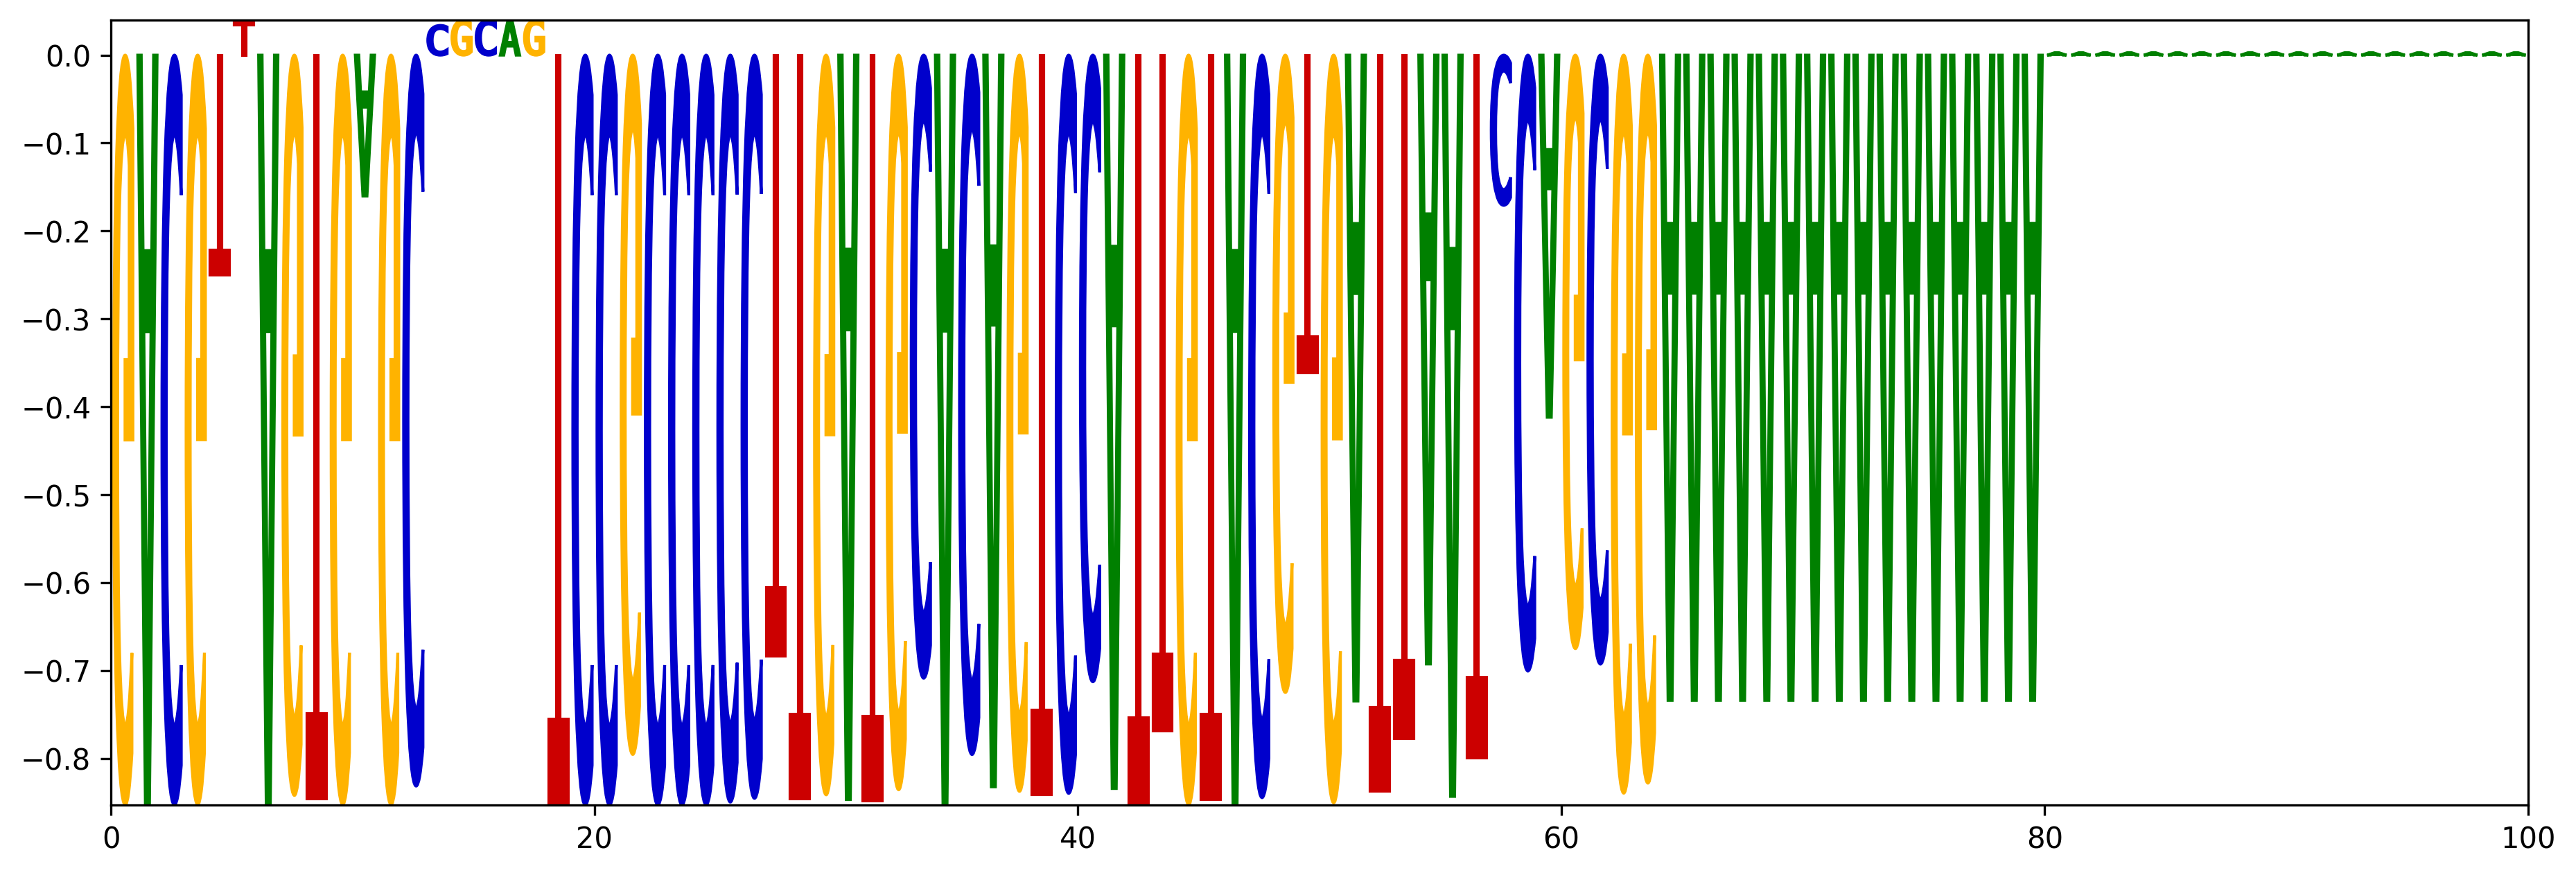

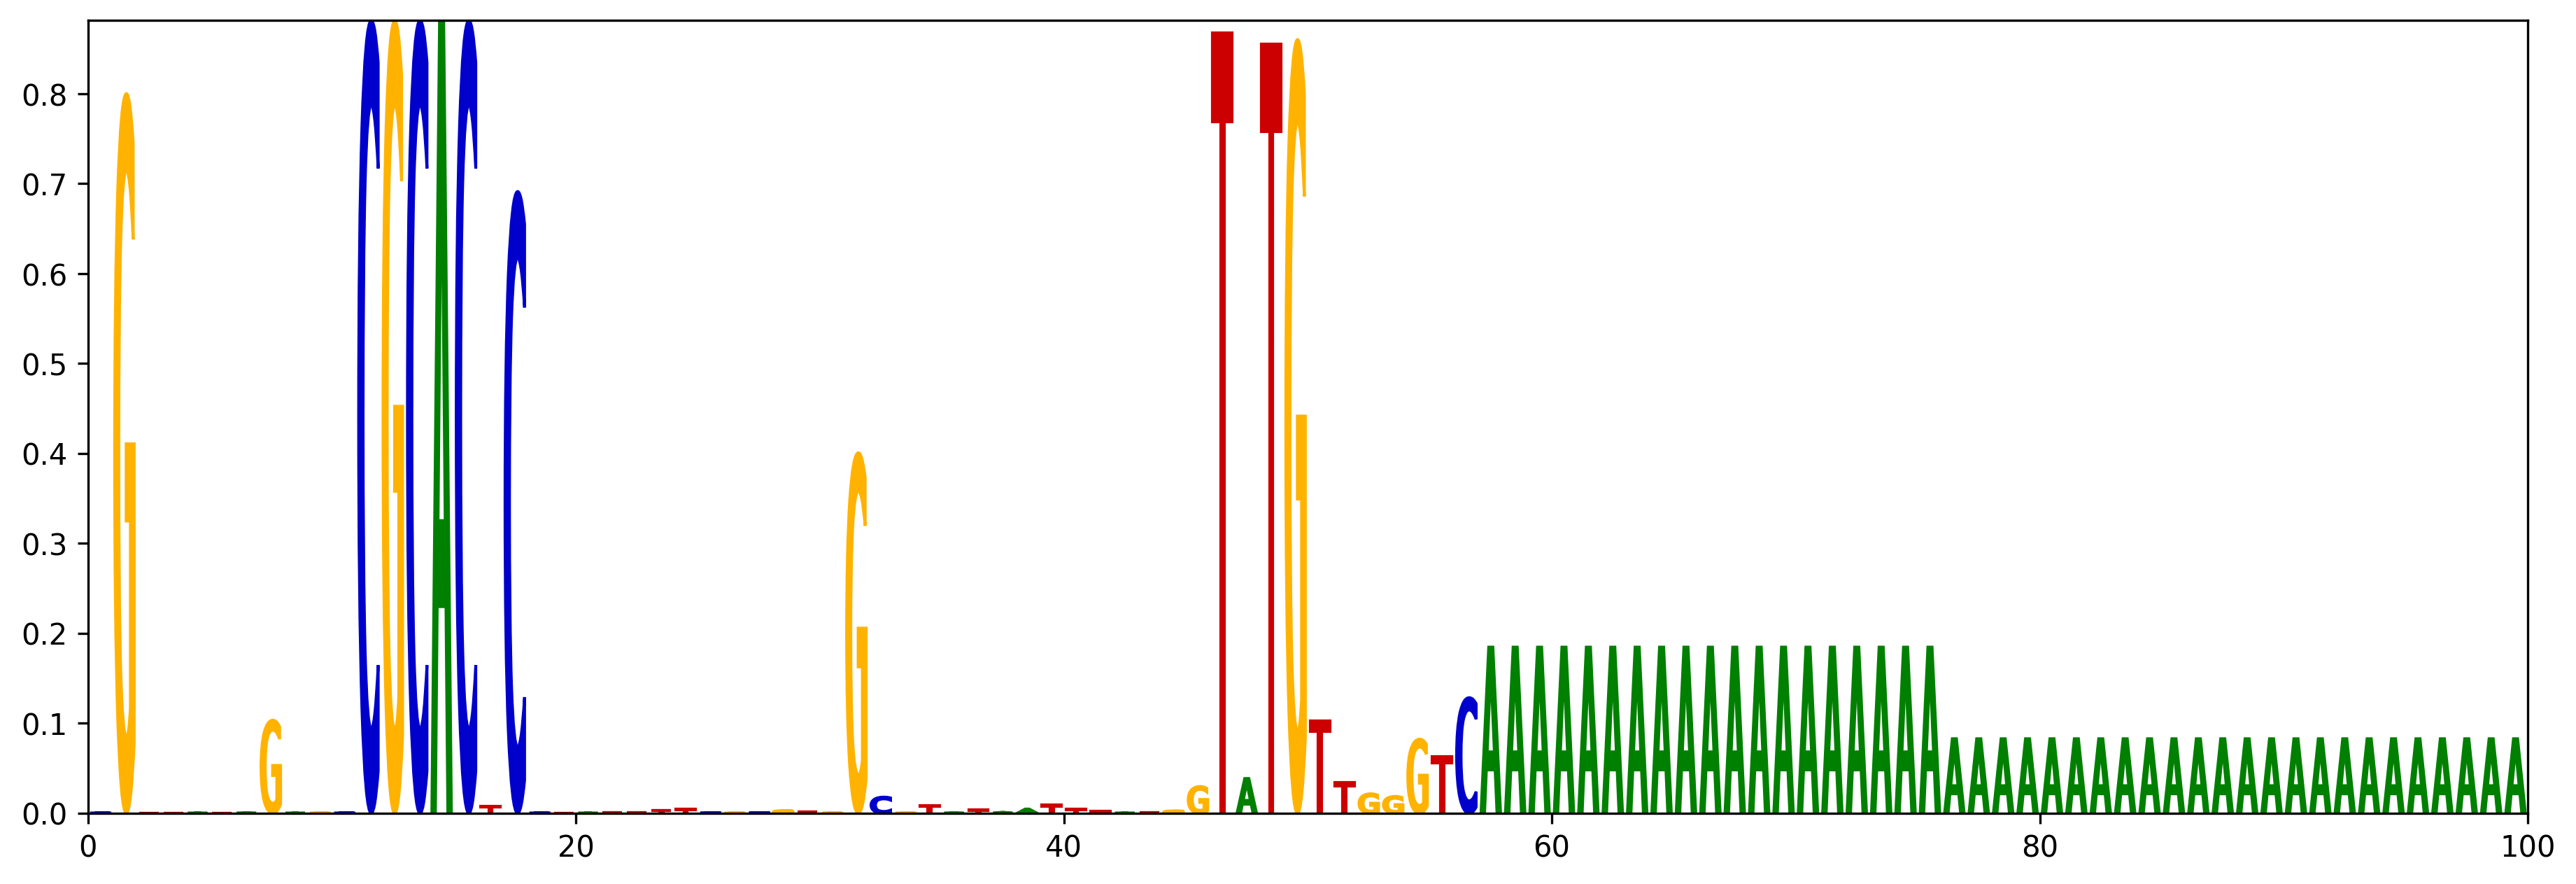

In [41]:
# Plot the 'ChIP-seq' for randomly 6 sequences for Model 2
index = np.random.randint(n, size=6)
sequencePlot = X_test[index,:]
sequencePredict = discriminator_2.predict(sequencePlot).flatten()

# Generate a new set of X, where for each sequence every nucleotide is consecutively set to 0
sequencePlot = sequencePlot.reshape(sequencePlot.shape[0],sequencePlot.shape[1],sequencePlot.shape[2],1)
sequenceRepeat = np.repeat(sequencePlot, 100, axis=0)
# Generate sequence with one deleted nucleotide
a = np.ones((100, 100), int)
np.fill_diagonal(a, 0)
b = np.repeat(a.reshape((1,100,100)), sequencePlot.shape[0], axis=0)
c = np.concatenate(b, axis=0)
d = np.multiply(sequenceRepeat, np.repeat(c.reshape((sequenceRepeat.shape[0], 100, 1, 1)), 4, axis=2))
#Calculate the prediction for each sequence with one deleted nucleotide
d_pred = discriminator_2.predict(d.reshape(600, 100, 4)).flatten()

# Score: Difference between prediction and d_pred
scores = np.reshape((np.repeat(sequencePredict, 100) - d_pred), (len(index),100))
import sys
import os
sys.path.append('/content/gdrive/My Drive')
import motif_plotter
import matplotlib.pyplot as plt

for i in range(len(index)):
    fig=plt.figure(figsize=(15, 5), dpi= 300)
    ax=fig.add_subplot(111)
    motif_plotter.make_single_sequence_spectrum(ax, 
                                                sequencePlot[i].reshape((100, 4)),
                                                np.arcsinh(scores[i]).reshape(100,1))
    plt.show()